
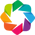

In [1]:
import holoviews as hv
hv.notebook_extension('bokeh')

In [2]:
import dask.dataframe as dd
import pandas as pd
from distributed import Client
client = Client(scheduler_file='/scratch/tmorton/dask/scheduler.json')

In [3]:
from explorer.catalog import ParquetCatalog
import glob

files = glob.glob('/scratch/tmorton/qa_explorer_data/forced_big_fake*.parq')[:32]
catalog = ParquetCatalog(files, client=client)

In [4]:
from explorer.functors import (Mag, MagDiff, CustomFunctor, DeconvolvedMoments, Column,
                            SdssTraceSize, PsfSdssTraceSizeDiff, HsmTraceSize,
                            PsfHsmTraceSizeDiff, CompositeFunctor)

In [5]:
funcs = {'y1':DeconvolvedMoments(), 
          'y2':MagDiff('modelfit_CModel', 'base_PsfFlux'),
#           'y3':PsfHsmTraceSizeDiff()
        }

In [6]:
from explorer.plots import SkyPlot

sky = SkyPlot(catalog, funcs, group_labels=True)

/home/tmorton/.conda/envs/my_py3/lib/python3.6/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


In [7]:
%time sky.figure

CPU times: user 1min 23s, sys: 8.97 s, total: 1min 32s
Wall time: 2min 10s


:Layout
   .DynamicMap.Deconvolved_Moments                                                                            :DynamicMap   [label]
   .DynamicMap.Left_parenthesis_mag_modelfit_CModel_flux_hyphen_minus_mag_base_PsfFlux_flux_right_parenthesis :DynamicMap   [label]

In [8]:
from explorer.plots import ScatterSkyPlot

scattersky = ScatterSkyPlot(catalog, funcs, linked=True)

In [9]:
%time scattersky.figure

CPU times: user 13.9 ms, sys: 0 ns, total: 13.9 ms
Wall time: 12.7 ms


:Layout
   .DynamicMap.I   :DynamicMap   []
   .DynamicMap.II  :DynamicMap   []
   .DynamicMap.III :DynamicMap   []
   .DynamicMap.IV  :DynamicMap   []

In [10]:
scattersky.reset_bounds()

In [16]:
scattersky.set_query('label=="null"')

In [10]:
scattersky._bounds_streams[1].event(bounds=(20,-5,30,1))

/home/tmorton/.conda/envs/my_py3/lib/python3.6/site-packages/holoviews/core/data/interface.py:202: RuntimeWarning: invalid value encountered in greater_equal
  mask &= k.start <= arr
/home/tmorton/.conda/envs/my_py3/lib/python3.6/site-packages/holoviews/core/data/interface.py:204: RuntimeWarning: invalid value encountered in less
  mask &= arr < k.stop
/home/tmorton/.conda/envs/my_py3/lib/python3.6/site-packages/holoviews/core/data/interface.py:202: RuntimeWarning: invalid value encountered in greater_equal
  mask &= k.start <= arr
/home/tmorton/.conda/envs/my_py3/lib/python3.6/site-packages/holoviews/core/data/interface.py:204: RuntimeWarning: invalid value encountered in less
  mask &= arr < k.stop
